In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import numpy as np
import os

In [41]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.int)

In [128]:
y6 = y[20013]
y4 = y[20040]
y4, y6

(4, 6)

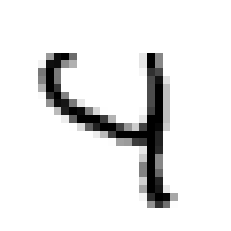

In [129]:
some_digit_4 = X[20040]
some_digit_image = some_digit_4.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

plt.show()

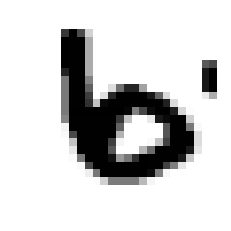

In [131]:
some_digit_6 = X[20013]
some_digit_image = some_digit_6.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

plt.show()

In [126]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [127]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [132]:
y_train_4 = (y_train == 4)
y_train_6 = (y_train == 6)

In [135]:
np.unique(y_train_6)

array([False,  True])

In [136]:
np.unique(y_train_4)

array([False,  True])

In [139]:
from sklearn.linear_model import SGDClassifier¢£

classifier_4 = SGDClassifier(max_iter=5, random_state=42)
classifier_4.fit(X_train, y_train_4)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [140]:
from sklearn.linear_model import SGDClassifier

classifier_6 = SGDClassifier(max_iter=5, random_state=42)
classifier_6.fit(X_train, y_train_6)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [142]:
from sklearn.model_selection import cross_val_score
cross_val_score(classifier_4, X_train, y_train_4, cv=3, scoring="accuracy")

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.97425, 0.9732 , 0.97645])

In [143]:
from sklearn.model_selection import cross_val_score
cross_val_score(classifier_6, X_train, y_train_6, cv=3, scoring="accuracy")

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.97475, 0.9839 , 0.98005])

## Dummy classifier

In [70]:
from sklearn.base import BaseEstimator
class Never46Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [146]:
never_4_clf = Never46Classifier()
cross_val_score(never_4_clf, X_train, y_train_4, cv=3, scoring="accuracy")

array([0.9035 , 0.90025, 0.90415])

In [147]:
never_6_clf = Never46Classifier()
cross_val_score(never_6_clf, X_train, y_train_6, cv=3, scoring="accuracy")

array([0.90305, 0.89955, 0.9015 ])

In [153]:
from sklearn.model_selection import cross_val_predict

y_train_pred_4 = cross_val_predict(classifier_4, X_train, y_train_4, cv=3)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [154]:
from sklearn.model_selection import cross_val_predict

y_train_pred_6 = cross_val_predict(classifier_6, X_train, y_train_6, cv=3)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [156]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_4, y_train_pred_4)

array([[53292,   866],
       [  656,  5186]])

In [157]:
confusion_matrix(y_train_6, y_train_pred_6)

array([[53785,   297],
       [  929,  4989]])

In [160]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_4, y_train_pred_4)

0.856906807666887

In [162]:
precision_score(y_train_6, y_train_pred_6)

0.9438138479001135

In [163]:
recall_score(y_train_4, y_train_pred_4)

0.8877096884628551

In [164]:
recall_score(y_train_6, y_train_pred_6)

0.8430212909766813

In [165]:
from sklearn.metrics import f1_score

f1_score(y_train_4, y_train_pred_4)

0.8720363208340339

In [166]:
f1_score(y_train_6, y_train_pred_6)

0.8905747947161727

In [167]:
y_scores_4 = classifier_4.decision_function([some_digit_4])

In [168]:
y_scores_6 = classifier_6.decision_function([some_digit_6])

In [170]:
threshold = 0
y_some_digit_pred_4 = (y_scores_4 > threshold)
y_some_digit_pred_4

array([ True])

In [171]:
threshold = 0
y_some_digit_pred_6 = (y_scores_6 > threshold)
y_some_digit_pred_6

array([ True])

In [173]:
y_scores_4 = cross_val_predict(classifier_4, X_train, y_train_4, cv=3,
                             method="decision_function")

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [174]:
y_scores_6 = cross_val_predict(classifier_6, X_train, y_train_6, cv=3,
                             method="decision_function")

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [175]:
y_scores_4.shape

(60000,)

In [176]:
y_scores_6.shape

(60000,)

In [177]:
from sklearn.metrics import precision_recall_curve

precisions_4, recalls_4, thresholds_4 = precision_recall_curve(y_train_4, y_scores_4)

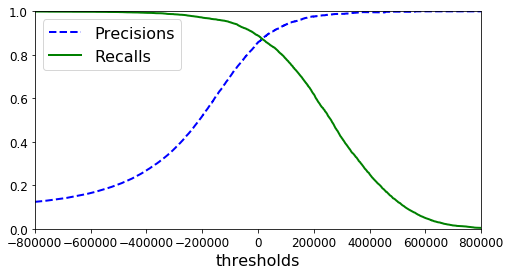

In [183]:
def plot_precision_recall_vs_threshold(precisions_4, recalls_4, thresholds_4):
    plt.plot(thresholds_4, precisions_4[:-1], "b--", label="Precisions", linewidth=2)
    plt.plot(thresholds_4, recalls_4[:-1], "g-", label="Recalls", linewidth=2)
    plt.xlabel("thresholds", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions_4, recalls_4, thresholds_4)
plt.xlim([-800000, 800000])
plt.show()

In [190]:
precisions_6, recalls_6, thresholds_6 = precision_recall_curve(y_train_6, y_scores_6)

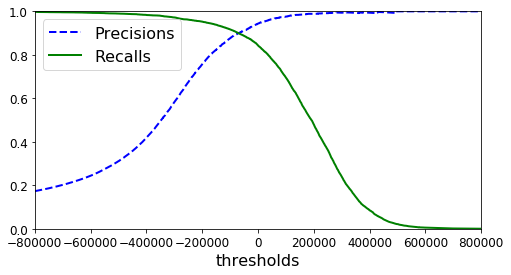

In [191]:
def plot_precision_recall_vs_threshold(precisions_6, recalls_6, thresholds_6):
    plt.plot(thresholds_6, precisions_6[:-1], "b--", label="Precisions", linewidth=2)
    plt.plot(thresholds_6, recalls_6[:-1], "g-", label="Recalls", linewidth=2)
    plt.xlabel("thresholds", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions_6, recalls_6, thresholds_6)
plt.xlim([-800000, 800000])
plt.show()

In [192]:
(y_train_pred_4 == (y_scores_4 > 0)).all()

True

In [193]:
(y_train_pred_6 == (y_scores_6 > 0)).all()

True

In [207]:
y_train_pred_90_4 = (y_scores_4 > 70000)

In [208]:
y_train_pred_90_6 = (y_scores_6 > 70000)

In [209]:
precision_score(y_train_4, y_train_pred_90_4)

0.9201228878648233

In [210]:
precision_score(y_train_6, y_train_pred_90_6)

0.9695975503062118

In [211]:
recall_score(y_train_4, y_train_pred_90_4)

0.8202670318384115

In [212]:
recall_score(y_train_6, y_train_pred_90_6)

0.7490706319702602

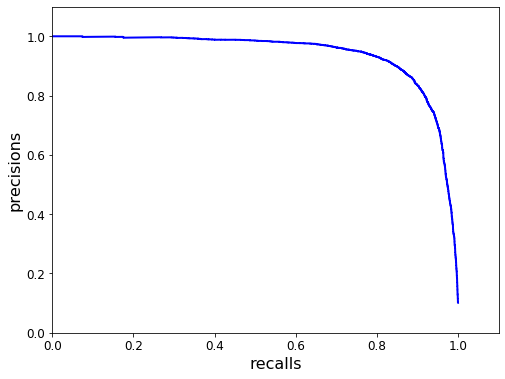

In [221]:
def plot_precision_vs_recall_4(precisions_4, recalls_4):
    plt.plot(recalls_4, precisions_4, "b-", linewidth=2)
    plt.xlabel("recalls", fontsize=16)
    plt.ylabel("precisions", fontsize=16)
    plt.axis([0, 1.1, 0, 1.1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall_4(precisions_4, recalls_4)
plt.show()

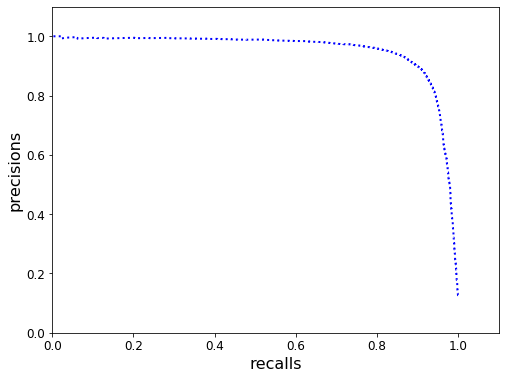

In [242]:
def plot_precision_vs_recall_6(precisions_6, recalls_6):
    plt.plot(recalls_6, precisions_6, "b:", linewidth=2)
    plt.xlabel("recalls", fontsize=16)
    plt.ylabel("precisions", fontsize=16)
    plt.axis([0, 1.1, 0, 1.1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall_6(precisions_6, recalls_6)
plt.show()

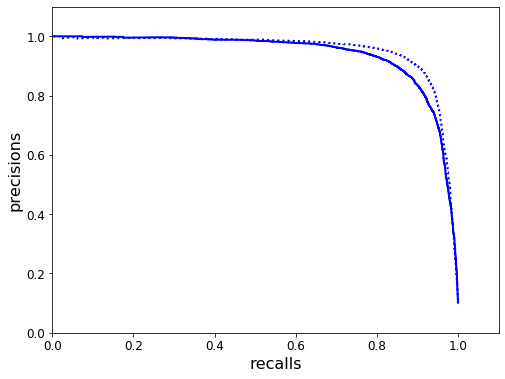

In [251]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall_4(precisions_4, recalls_4)
plot_precision_vs_recall_6(precisions_6, recalls_6)
plt.show()

In [252]:
from sklearn.metrics import roc_curve

fpr_4, tpr_4, thresholds_4 = roc_curve(y_train_4, y_scores_4)

In [253]:
fpr_6, tpr_6, thresholds_6 = roc_curve(y_train_6, y_scores_6)

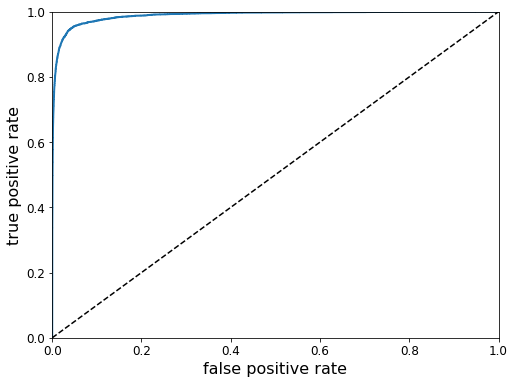

In [255]:
def plot_roc_curve_4(fpr_4, tpr_4, label=None):
    plt.plot(fpr_4, tpr_4, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('false positive rate', fontsize=16)
    plt.ylabel('true positive rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve_4(fpr_4, tpr_4)
plt.show()

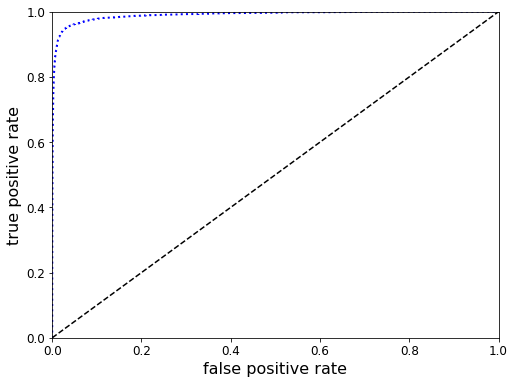

In [261]:
def plot_roc_curve_6(fpr_6, tpr_6, label=None):
    plt.plot(fpr_6, tpr_6, "b:", linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('false positive rate', fontsize=16)
    plt.ylabel('true positive rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve_6(fpr_6, tpr_6)
plt.show()

In [262]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_4, y_scores_4)

0.9884444924665944

In [264]:
roc_auc_score(y_train_6, y_scores_6)

0.9900285597631594

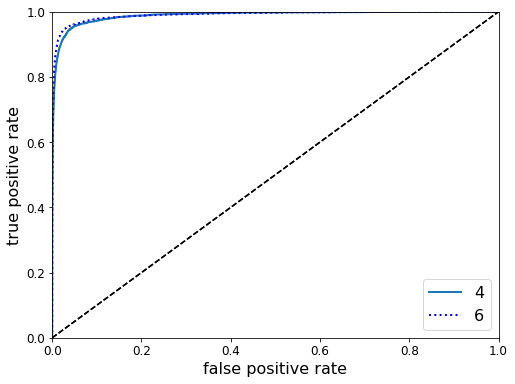

In [268]:
plt.figure(figsize=(8, 6))
plot_roc_curve_4(fpr_4, tpr_4, "4")
plot_roc_curve_6(fpr_6, tpr_6, "6")
plt.legend(loc="lower right", fontsize=16)
plt.show()